# Project 1 : PlayStore Analysis

# Submitted By : Kamal Pratap Singh

# import libraries

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

In [88]:
df = pd.read_csv('playstore-analysis.csv')

In [89]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [90]:
df.shape

(10841, 13)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [92]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# Missing Value Treatment

## a) - Drop records where rating is missing since rating is our target/study variable

In [93]:
df.dropna(how = 'any',subset = ['Rating'],axis= 0,inplace = True)

In [94]:
df.Rating.isnull().sum()

0

## b) - Check the null values for the Android Ver column. 

In [95]:
df.loc[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


### i)- Are all 3 records having the same problem?

Yes all 3 records have same problem i.e all NaN

### ii) - Drop the 3rd record i.e. record for “Life Made WIFI …”

In [96]:
df.drop(10472,axis = 0,inplace = True)

In [97]:
df.loc[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


### iii) - Replace remaining missing values with the mode

In [98]:
df['Android Ver'].mode()[0]

'4.1 and up'

In [99]:
df['Android Ver'].fillna(df['Android Ver'].mode()[0], inplace = True)

In [100]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [101]:
df.loc[df['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [102]:
df['Current Ver'].mode()[0]

'Varies with device'

In [103]:
df['Current Ver'].fillna(df['Current Ver'].mode()[0],inplace = True)

In [104]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

## 2. Data clean up – correcting the data types

### a). Which all variables need to be brought to numeric types?

In [105]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [106]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### So after analyzing the data types - Reviews,Installs,Price must be numeric

### b). Price variable – remove $ sign and convert to float

In [107]:
df['Price'] = df.Price.str.replace('$',' ').astype(float)
df['Price']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10834    0.0
10836    0.0
10837    0.0
10839    0.0
10840    0.0
Name: Price, Length: 9366, dtype: float64

### c).Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [108]:
df['Installs']=df['Installs'].str.replace('+', '').str.replace(',', '').astype(int)

In [109]:
df['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 9366, dtype: int32

In [110]:
df['Installs'].dtypes

dtype('int32')

### d). Convert all other identified columns to numeric

In [111]:
df['Reviews'] = df['Reviews'].astype(int)

In [112]:
df['Reviews'].dtypes

dtype('int32')

## 3. Sanity checks – check for the following and handle accordingly

### a). Avg. rating should be between 1 and 5, as only these values are allowed on the play store.

In [113]:
df.loc[df['Rating']<1] | df[df['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


so there are no records

## b. Reviews should not be more than installs as only those who installed can review the app.
### i. Are there any such records? Drop if so.

In [114]:
df[df['Reviews']>df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


### There are 7 records where reviews greater then installs.

In [115]:
index = df[df.Reviews>df.Installs].index
df.drop(labels = index,inplace = True)

In [116]:
df[df.Reviews>df.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


### Dropped 7 records

## Identify and handle outliers – 

Price column

### i). Make suitable plot to identify outliers in price

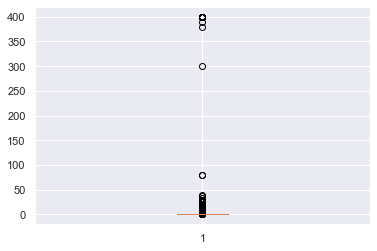

In [117]:
sns.set()
plt.boxplot(df['Price'])
plt.show()

### ii). Do you expect apps on the play store to cost $200? Check out these cases

In [118]:
df[df['Price']>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [119]:
df.drop(df[df.Price>200].index, inplace = True)

In [120]:
df[df['Price']>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


### iii). After dropping the useless records, make the suitable plot again to identify outliers

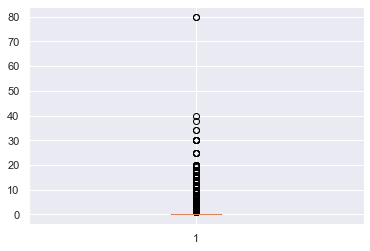

In [121]:
plt.boxplot(df['Price'])
plt.show()

### iv).Limit data to records with price < $30

In [122]:
df.drop(df[df['Price']>30].index , inplace = True)

In [123]:
counts = df[df['Price']>30].index
counts.value_counts().sum()

0

In [124]:
df[df['Price']>30]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


### b). Reviews column

### i). Make a Suitable Plot

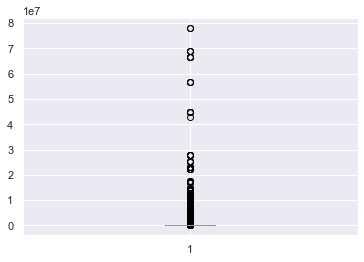

In [125]:
plt.boxplot(df['Reviews'])
plt.show()

### ii). Limit data to apps with < 1 Million reviews

In [126]:
df.drop(df[df['Reviews']>1000000].index,inplace = True)

In [127]:
df[df['Reviews']>1000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


### there are no records greater then 1 Million

## c).Installs

### i). What is the 95th percentile of the installs?

In [128]:
Percentile = df['Installs'].quantile(0.95)

In [129]:
Percentile

10000000.0

### 10000000.0 value is 95th percentile

### ii).Drop records having a value more than the 95th percentile

In [130]:
df[df['Installs']>10000000.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
143,Amazon Kindle,BOOKS_AND_REFERENCE,4.2,814080,21516.529524,100000000,Free,0.0,Teen,Books & Reference,"July 27, 2018",Varies with device,Varies with device
188,Indeed Job Search,BUSINESS,4.3,674730,21516.529524,50000000,Free,0.0,Everyone,Business,"May 21, 2018",Varies with device,Varies with device
192,Docs To Go™ Free Office Suite,BUSINESS,4.1,217730,21516.529524,50000000,Free,0.0,Everyone,Business,"April 2, 2018",Varies with device,Varies with device
225,Secure Folder,BUSINESS,3.8,14760,8600.000000,50000000,Free,0.0,Everyone,Business,"January 31, 2018",1.1.07.6,7.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10408,Shoot Hunter-Gun Killer,GAME,4.3,320334,27000.000000,50000000,Free,0.0,Teen,Action,"August 8, 2018",1.1.2,4.1 and up
10429,Talking Tom Bubble Shooter,FAMILY,4.4,687136,54000.000000,50000000,Free,0.0,Everyone,Casual,"May 25, 2018",1.5.3.20,4.1 and up
10513,Flight Simulator: Fly Plane 3D,FAMILY,4.0,660613,21000.000000,50000000,Free,0.0,Everyone,Simulation,"March 1, 2017",1.32,2.3 and up
10549,Toy Truck Rally 3D,GAME,4.0,301895,25000.000000,50000000,Free,0.0,Everyone,Racing,"May 23, 2018",1.4.4,4.1 and up


In [131]:
df.drop(df[df['Installs']>10000000.0].index,inplace = True)

In [132]:
df[df['Installs']>10000000.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


## Data analysis to answer business questions

### 5). What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

### a). How do you explain this?

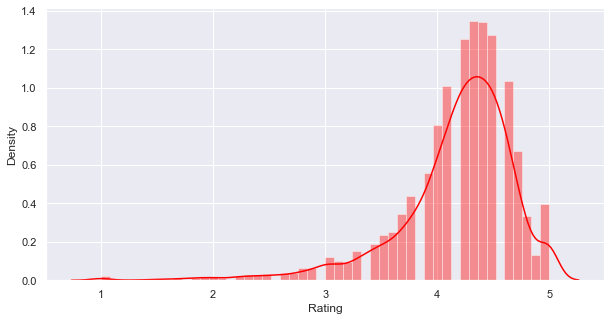

In [133]:
plt.figure(figsize=(10,5))
sns.distplot(df['Rating'], color='red')
plt.show()

In [134]:
print('The skewness of the distribution:',df['Rating'].skew())

The skewness of the distribution: -1.7434270330647985


### b). What is the implication of this on your analysis?

In [135]:
print('The median of the distribution of rating is:',df['Rating'].median())
print('The mean of the distribution of rating is: ',df['Rating'].mean())
print('The mode of the distribution of rating is: ',df['Rating'].mode()[0])

The median of the distribution of rating is: 4.3
The mean of the distribution of rating is:  4.170800237107298
The mode of the distribution of rating is:  4.3


#### The mode=>median>mean the distribution is negatively skewed .Therefore the rating is more skewed towords lower values  

## 6. What are the top Content Rating values?

### a). Are there any values with very few records?

In [136]:
df['Content Rating'].value_counts()

Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

#### 2 values are having very few records  1-Adults only 18+ , 2-  Unrated

### b). If yes, drop those as they won’t help in the analysis

In [139]:
Analysis=df.loc[(df['Content Rating']=='Adults only 18+') | (df['Content Rating']=='Unrated')]
df.drop(Analysis.index, inplace=True)

In [140]:
df['Content Rating'].value_counts()

Everyone        6782
Teen             900
Mature 17+       417
Everyone 10+     332
Name: Content Rating, dtype: int64

## 7). Effect of size on rating

### a). Make a joinplot to understand the effect of size on rating

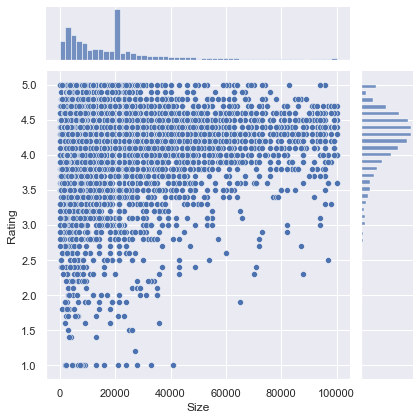

In [157]:
sns.jointplot(data=df,x = 'Size',y = 'Rating',kind = 'scatter')
plt.show()

### b). Do you see any patterns?

#### yes pattern can be observed between size and rating i.e they are posivetly correlated

### c). How do you explain the pattern?

In [170]:
corr,_=pearsonr(df['Size'],df['Rating'])
print('Correlation between Size and Rating is: %.3f' % corr)

Correlation between Size and Rating is: 0.058


Thus there is a Positive correlation of app size and rating with the magnitute of 0.058. Hence the rating increases the app size also increses

## 8). Effect of price on rating

### a). Make a jointplot (with regression line)

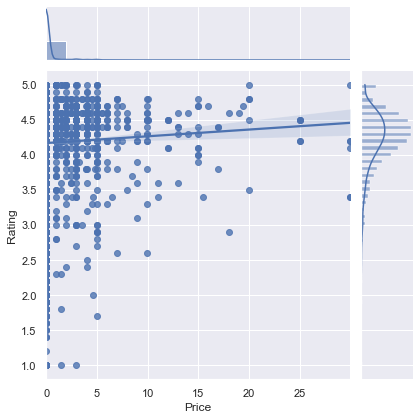

In [174]:
sns.jointplot(data = df,x = 'Price',y = 'Rating' , kind = 'reg')
plt.show()

### b). What pattern do you see?

Generally on increasing the Price, Rating remains almost constant greater than 4

### c). How do you explain the pattern?

Since on increasing the price Rating remains almost constant. SO there is a week Positive correlation between price and rating

In [175]:
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.158547,0.058076,0.118414,0.031479
Reviews,0.158547,1.000000,0.204667,0.736038,-0.073446
Size,0.058076,0.204667,1.000000,0.190741,-0.001054
Installs,0.118414,0.736038,0.190741,1.000000,-0.110507
Price,0.031479,-0.073446,-0.001054,-0.110507,1.000000


Here we also we can see the there is a week positive correlation with a magnitude of 0.031479 of between Price and Rating

### d). Replot the data, this time with only records with price > 0 

In [177]:
PR = df[df['Price']>0]

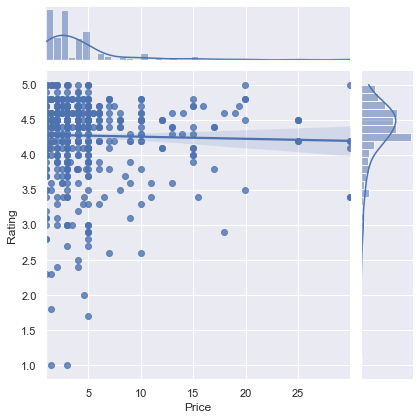

In [178]:
sns.jointplot(data = PR,x = 'Price',y = 'Rating', kind = 'reg')

Pattern is bit scattered and the rating range (4-4.5) is decreased and again most apps are of below 5 Price for which people rated

### e). Does the pattern change?

Yes,on making pairplot between Price and Rating having price of app >0.I observed that there is a week negative corralation between Price and rating i.e as the price increases and rating decreases.we can also verify it correlation too by:-

In [179]:
PR.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.095986,0.117943,0.063960,-0.025975
Reviews,0.095986,1.000000,0.163959,0.787628,-0.049764
Size,0.117943,0.163959,1.000000,0.119255,0.024912
Installs,0.063960,0.787628,0.119255,1.000000,-0.057710
Price,-0.025975,-0.049764,0.024912,-0.057710,1.000000


Thus here we observed that there is negative correlation between rating and price with a magnitude of 0.025975

### f). What is your overall inference on the effect of price on the rating.

Generally on increases the price rating increases but at very slow rate i.e very week positive relation with a magnitude of 0.031479

## 9). Look at all the numeric interactions together – 

### a). Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

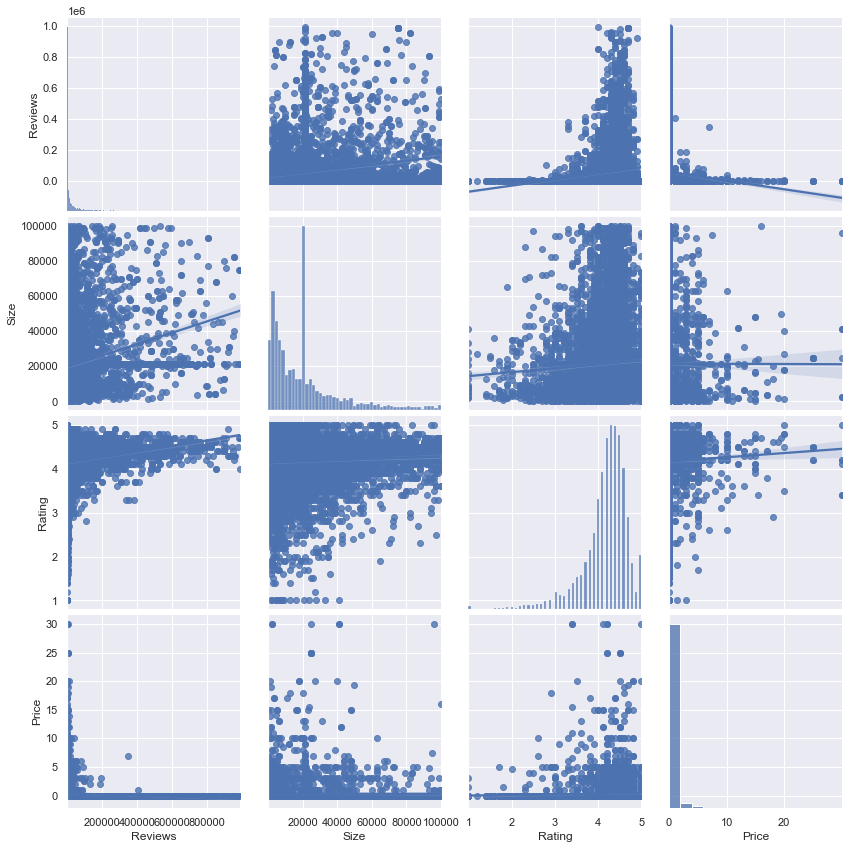

In [181]:
sns.pairplot(df,vars = ['Reviews','Size','Rating','Price'],kind = 'reg',height = 3)

## 10). Rating vs. content rating

### a). Make a bar plot displaying the rating for each content rating

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

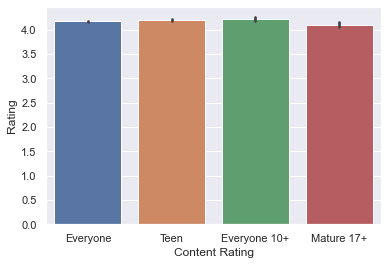

In [182]:
sns.barplot(data = df,x = 'Content Rating',y = 'Rating')

### b). Which metric would you use? Mean? Median? Some other quantile?

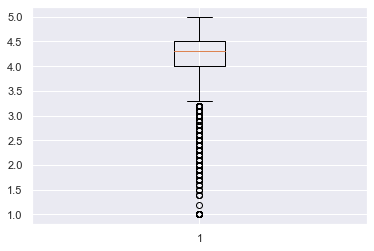

In [185]:
plt.boxplot(df['Rating'])
plt.show()

<AxesSubplot:xlabel='Content Rating'>

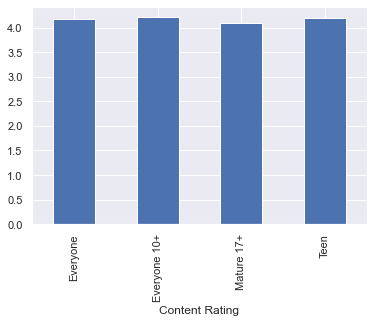

In [187]:
df.groupby(['Content Rating'])['Rating'].mean().plot.bar()

### c). Choose the right metric and plot

<AxesSubplot:xlabel='Content Rating'>

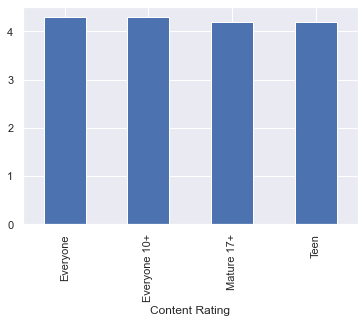

In [188]:
df.groupby(['Content Rating'])['Rating'].median().plot.bar()

## 11). Content rating vs. size vs. rating – 3 variables at a time

### a). Create 5 buckets (20% records in each) based on Size

In [189]:
bins = [0,2000,4000,6000,8000,10000]
df['Bucket Size'] = pd.cut(df['Size'],bins,labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])

In [190]:
pd.pivot_table(df, values = 'Rating',index = 'Bucket Size',columns = 'Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,4.047786,4.250000,3.480000,4.405882
20k-40k,4.140583,4.033333,3.875000,4.177778
40k-60k,4.153299,4.341667,4.294286,4.068519
60k-80k,4.151542,3.957143,3.939130,4.263889
80k-100k,4.150227,4.246154,4.117857,4.310870


### b). By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [192]:
CR_vs_SB = pd.pivot_table(df, values = 'Rating',index = 'Bucket Size',columns = 'Content Rating',
                          aggfunc = lambda x:np.quantile(x,0.2))

In [193]:
CR_vs_SB

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,3.7,4.16,2.88,3.94
20k-40k,3.8,3.82,3.36,3.80
40k-60k,3.9,4.20,3.84,3.80
60k-80k,3.8,3.70,3.50,4.00
80k-100k,3.8,4.08,3.90,3.90


### c). Make a heatmap of this

#### i). Annotated

<AxesSubplot:xlabel='Content Rating', ylabel='Bucket Size'>

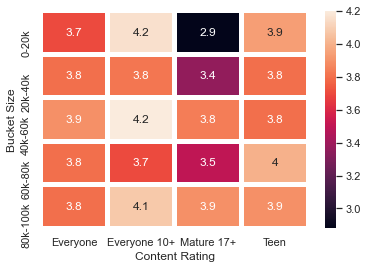

In [194]:
sns.heatmap(CR_vs_SB,annot =True,linewidths = 4)

#### i). Greens color map

<AxesSubplot:xlabel='Content Rating', ylabel='Bucket Size'>

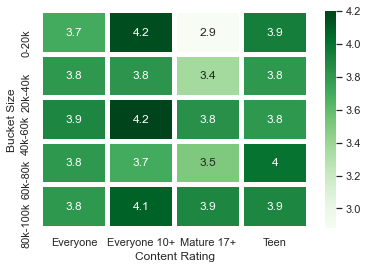

In [196]:
sns.heatmap(CR_vs_SB,annot = True,linewidths = 4,cmap = 'Greens')

### d). What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

Based on analysis,it's not true that lighter apps or heavier apps are preffered in all categories. Because app with size 40k-60k and 80k-100k have got highest rating. So in general we conclude that heavier apps are preffered over lighter apps